**Assignment 6:** Visualize CNN Feature Maps.

*Explanation:* Extract intermediate layers and display their activations to see what the model "sees".


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.3936 - loss: 1.6780 - val_accuracy: 0.5458 - val_loss: 1.3132
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6071 - loss: 1.1406 - val_accuracy: 0.6437 - val_loss: 1.0508
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6542 - loss: 1.0044 - val_accuracy: 0.6593 - val_loss: 0.9882
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


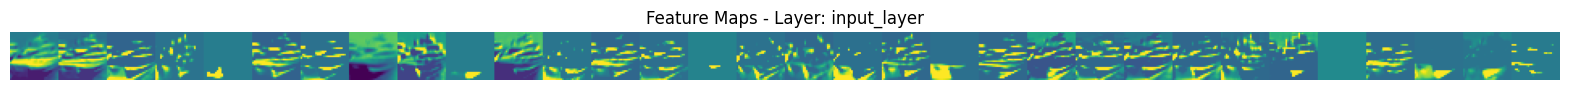

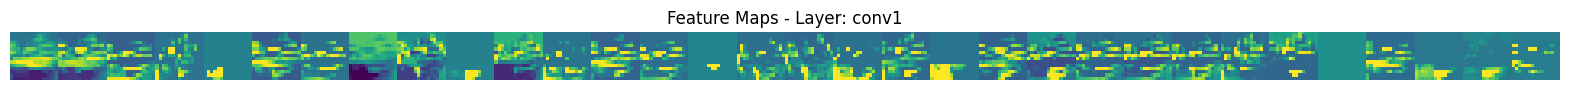

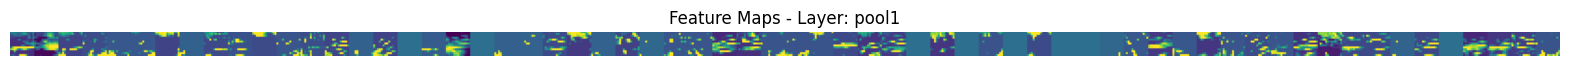

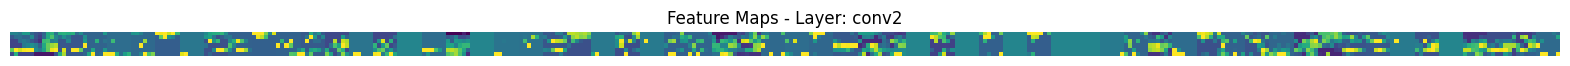

In [ ]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Step 2: Load and preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Build a simple CNN
input_layer = Input(shape=(32, 32, 3))
x = Conv2D(32, (3,3), activation='relu', name='conv1')(input_layer)
x = MaxPooling2D((2,2), name='pool1')(x)
x = Conv2D(64, (3,3), activation='relu', name='conv2')(x)
x = MaxPooling2D((2,2), name='pool2')(x)
x = Flatten()(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model (few epochs for demo)
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# Step 5: Select one test image
image = x_test[1]
image_input = np.expand_dims(image, axis=0)

# Step 6: Extract intermediate layers
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Step 7: Predict activations
activations = activation_model.predict(image_input)

# Step 8: Visualize activations
for layer_name, activation in zip([layer.name for layer in activation_model.layers], activations):
    n_features = activation.shape[-1]  # number of channels
    size = activation.shape[1]         # width/height of feature map

    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
        feature_map = activation[0, :, :, i]
        feature_map -= feature_map.mean()
        feature_map /= (feature_map.std() + 1e-5)
        feature_map *= 64
        feature_map += 128
        feature_map = np.clip(feature_map, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = feature_map

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(f'Feature Maps - Layer: {layer_name}')
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.axis('off')
    plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8358 - loss: 0.5773 - val_accuracy: 0.9724 - val_loss: 0.0865
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9720 - loss: 0.0902 - val_accuracy: 0.9776 - val_loss: 0.0638
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9795 - loss: 0.0689 - val_accuracy: 0.9822 - val_loss: 0.0537
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


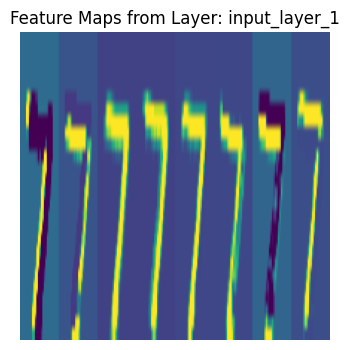

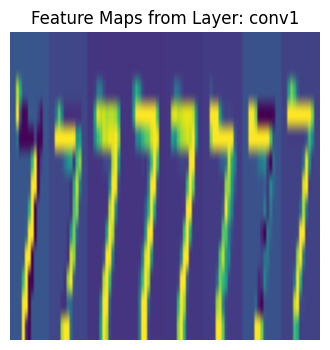

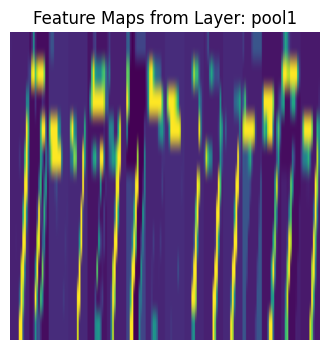

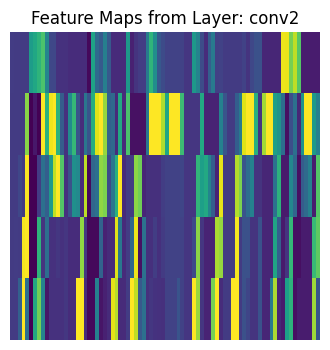

In [ ]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Reshape

# Step 2: Load and Preprocess MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Create a Simple CNN
input_layer = Input(shape=(28, 28, 1))
x = Conv2D(8, (3,3), activation='relu', name='conv1')(input_layer)
x = MaxPooling2D((2,2), name='pool1')(x)
x = Conv2D(16, (3,3), activation='relu', name='conv2')(x)
x = MaxPooling2D((2,2), name='pool2')(x)
x = Flatten()(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model (few epochs for quick demo)
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# Step 5: Choose an image to visualize
image = x_test[0]  # Digit image
image_input = np.expand_dims(image, axis=0)

# Step 6: Extract intermediate layers (convs and pools)
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Step 7: Get the activations
activations = activation_model.predict(image_input)

# Step 8: Visualize each activation map
for layer_name, activation in zip([layer.name for layer in activation_model.layers], activations):
    num_filters = activation.shape[-1]
    size = activation.shape[1]

    # Create a grid for displaying feature maps
    display_grid = np.zeros((size, size * num_filters))

    for i in range(num_filters):
        feature_map = activation[0, :, :, i]
        feature_map -= feature_map.mean()
        feature_map /= (feature_map.std() + 1e-5)
        feature_map *= 64
        feature_map += 128
        feature_map = np.clip(feature_map, 0, 255).astype('uint8')
        display_grid[:, i * size:(i + 1) * size] = feature_map

    scale = 1. / num_filters
    plt.figure(figsize=(scale * num_filters * 4, 4))
    plt.title(f"Feature Maps from Layer: {layer_name}")
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.axis('off')
    plt.show()
